# Visualize time series data sample from healthcare dataset

*Suiyi Liu, 2023.7.10*

- import necessary libaraies
- read dataset: transform into standard time series form
- visualize the observed data in certain sample dataset
- visualize a certain attribute in all patient dataset
- distributions of missing ratio in different attributes

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os,sys
import warnings

os.chdir(sys.path[0])
warnings.filterwarnings("ignore")

In [17]:
# known info about attributes
attr_count=35
hour_count=48

# 35 attributes which contains enough non-values
attributes = ['DiasABP', 'HR', 'Na', 'Lactate', 'NIDiasABP', 'PaO2', 'WBC', 'pH', 'Albumin', 'ALT', 'Glucose', 'SaO2',
              'Temp', 'AST', 'Bilirubin', 'HCO3', 'BUN', 'RespRate', 'Mg', 'HCT', 'SysABP', 'FiO2', 'K', 'GCS',
              'Cholesterol', 'NISysABP', 'TroponinT', 'MAP', 'TroponinI', 'PaCO2', 'Platelets', 'Urine', 'NIMAP',
              'Creatinine', 'ALP']

def extract_hour(x)->int:
    """convert string type index into int type"""
    h, _ = map(int, x.split(":"))
    return h

def parse_data(x)->list[float]:
    """extract the last value for each attribute"""
    x = x.set_index("Parameter").to_dict()["Value"]
    values = []

    for attr in attributes:
        if x.__contains__(attr):
            values.append(x[attr])
        else:
            values.append(np.nan)
    return values

def read_data(path:str)->pd.DataFrame:
    dataset_raw=pd.read_csv(path)
    dataset_raw["Time"]=dataset_raw["Time"].apply(lambda x: extract_hour(x))

    _list:list[list[float]]=[]
    for h in range(48):
        _list.append(parse_data(dataset_raw[dataset_raw["Time"] == h]))
    dataset=pd.DataFrame(_list,columns=attributes)
    return dataset


In [7]:
dataset=read_data("./sample_data.csv")
dataset_valid=dataset.dropna(how="all",axis=1)
dataset_valid.head()

,DiasABP,HR,Na,Lactate,NIDiasABP,PaO2,WBC,pH,Albumin,ALT,...,NISysABP,TroponinT,MAP,TroponinI,PaCO2,Platelets,Urine,NIMAP,Creatinine,ALP
0,NaN,77.0,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,...,157.0,NaN,NaN,NaN,NaN,NaN,60.0,91.00,NaN,NaN
1,NaN,60.0,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,...,137.0,NaN,NaN,NaN,NaN,NaN,30.0,87.00,NaN,NaN
2,NaN,62.0,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,...,123.0,NaN,NaN,NaN,NaN,NaN,170.0,75.67,NaN,NaN
3,NaN,80.0,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,...,114.0,NaN,NaN,NaN,NaN,NaN,60.0,72.67,NaN,NaN
4,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


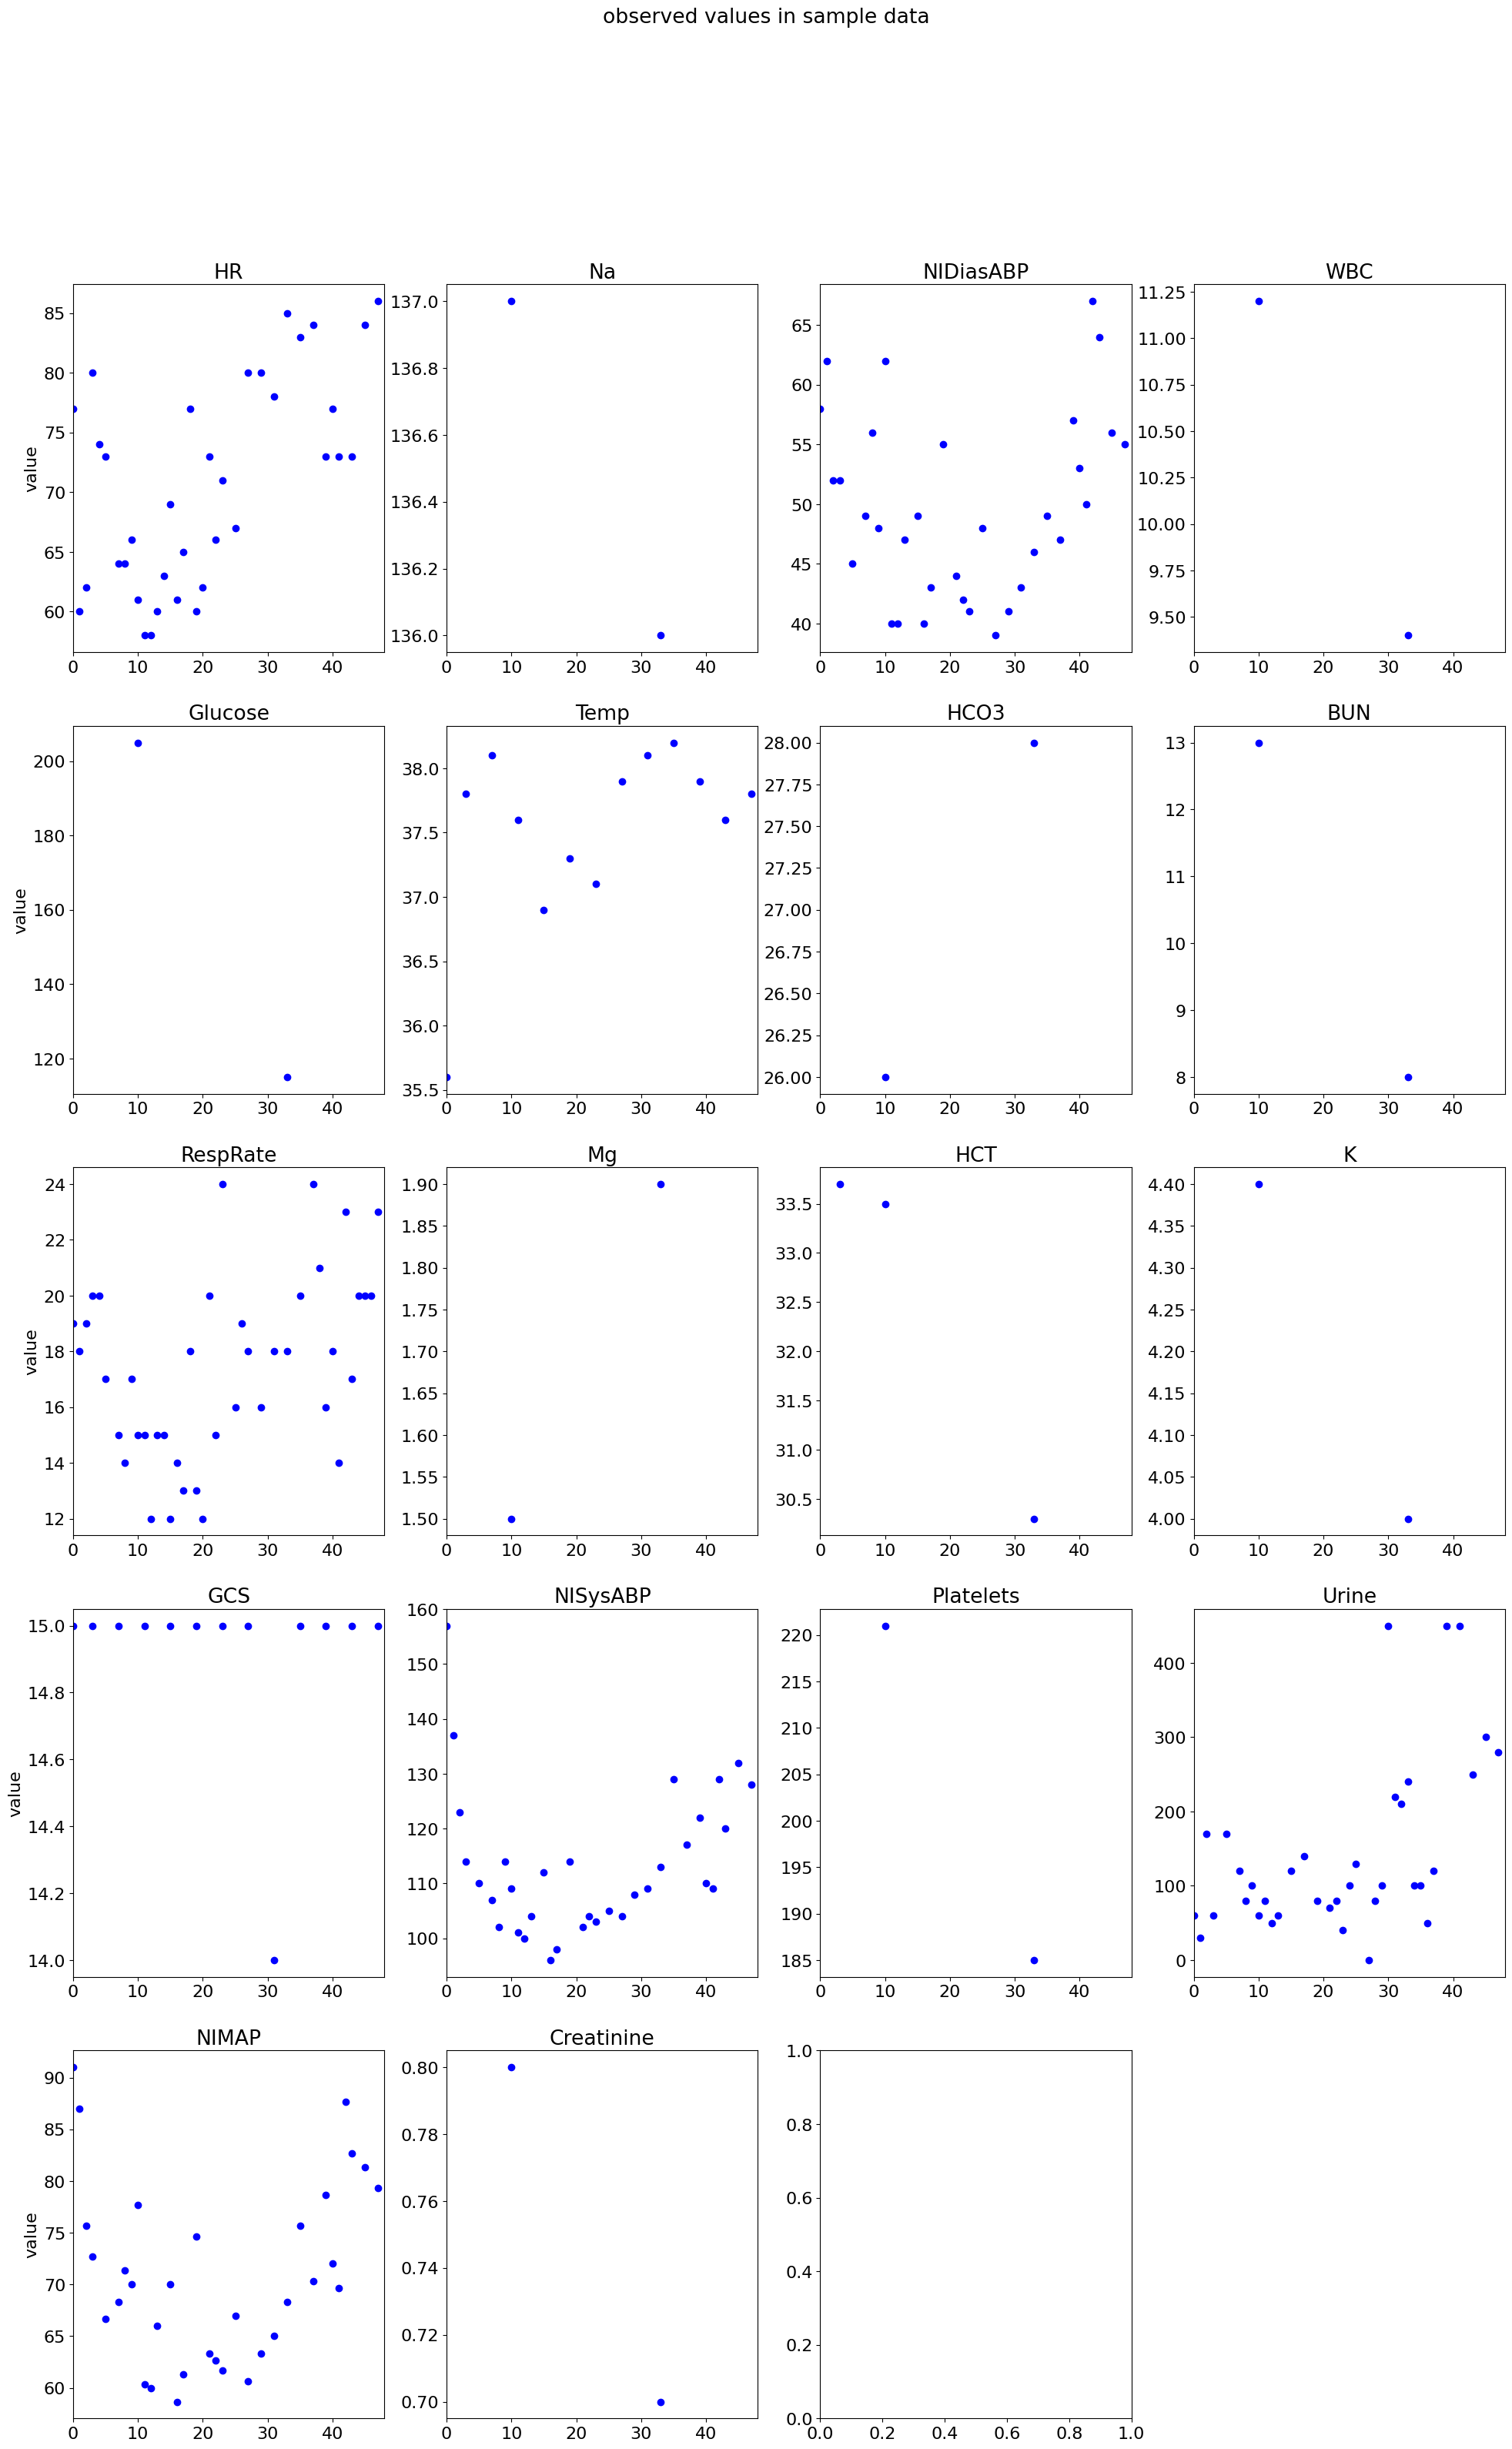

In [13]:

plt.rcParams["font.size"] = 16
L,K=dataset_valid.shape

fig, axes = plt.subplots(nrows=int(np.ceil(K/4)), ncols=4,figsize=(24.0, 36.0))
fig.delaxes(axes[-1][-1])

for k,attr in zip(range(K),dataset_valid.columns):
    df=pd.DataFrame({"x":np.arange(0,L),"val":dataset_valid[attr]})
    row = k // 4
    col = k % 4
    axes[row][col].plot(df.x,df.val, color = 'b',marker = 'o', linestyle='None')
    axes[row][col].set_xlim((0,L))
    axes[row][col].set_title(attr)
    
    
    if col == 0:
        plt.setp(axes[row, 0], ylabel='value')
    if row == -1:
        plt.setp(axes[-1, col], xlabel='time')
#plt.suptitle("observed values in sample data")
plt.show()
    

In [15]:
def get_idlist()->list:
    """get patient id from file names in 6 digital form and sort"""
    patient_id = []
    for filename in os.listdir("../data/physio/set-a"):
        match = re.search(r"\d{6}", filename) 
        if match:
            patient_id.append(match.group())
    patient_id = np.sort(patient_id)
    return patient_id.tolist()


In [31]:
id_list=get_idlist()
print(len(id_list))
id_count=50
id_list=id_list[0:id_count] # for a preview
dataset_list:list[pd.DataFrame]=[]
for _id in id_list:
    try:
        dataset=read_data("../data/physio/set-a/{}.txt".format(_id))
        dataset_list.append(dataset)
    except IOError as e:
        print(_id,e)
        continue

4000


In [32]:
target_attr="NIDiasABP"
attr_df=pd.DataFrame(columns=id_list)
for k in range(0,len(id_list)):
    _id=id_list[k]
    _values=dataset_list[k][target_attr]
    attr_df[_id]=_values
attr_df=attr_df.dropna(how="all",axis=1)
attr_df.head()

,132539,132540,132541,132543,132545,132547,132548,132551,132554,132555,...,132618,132622,132623,132632,132634,132635,132636,132639,132642,132650
0,58.0,NaN,83.0,69.0,NaN,NaN,79.0,NaN,NaN,NaN,...,47.0,NaN,NaN,82.0,39.0,NaN,53.0,NaN,71.0,91.0
1,62.0,NaN,89.0,63.0,NaN,NaN,76.0,NaN,NaN,NaN,...,55.0,68.0,NaN,45.0,43.0,NaN,53.0,NaN,80.0,68.0
2,52.0,NaN,82.0,74.0,50.0,NaN,77.0,NaN,NaN,NaN,...,48.0,49.0,NaN,66.0,44.0,NaN,51.0,NaN,86.0,62.0
3,52.0,NaN,75.0,70.0,29.0,NaN,NaN,NaN,71.0,NaN,...,53.0,64.0,NaN,58.0,NaN,NaN,53.0,NaN,71.0,68.0
4,NaN,NaN,72.0,68.0,44.0,89.0,NaN,NaN,71.0,NaN,...,57.0,38.0,NaN,49.0,NaN,NaN,35.0,NaN,91.0,48.0


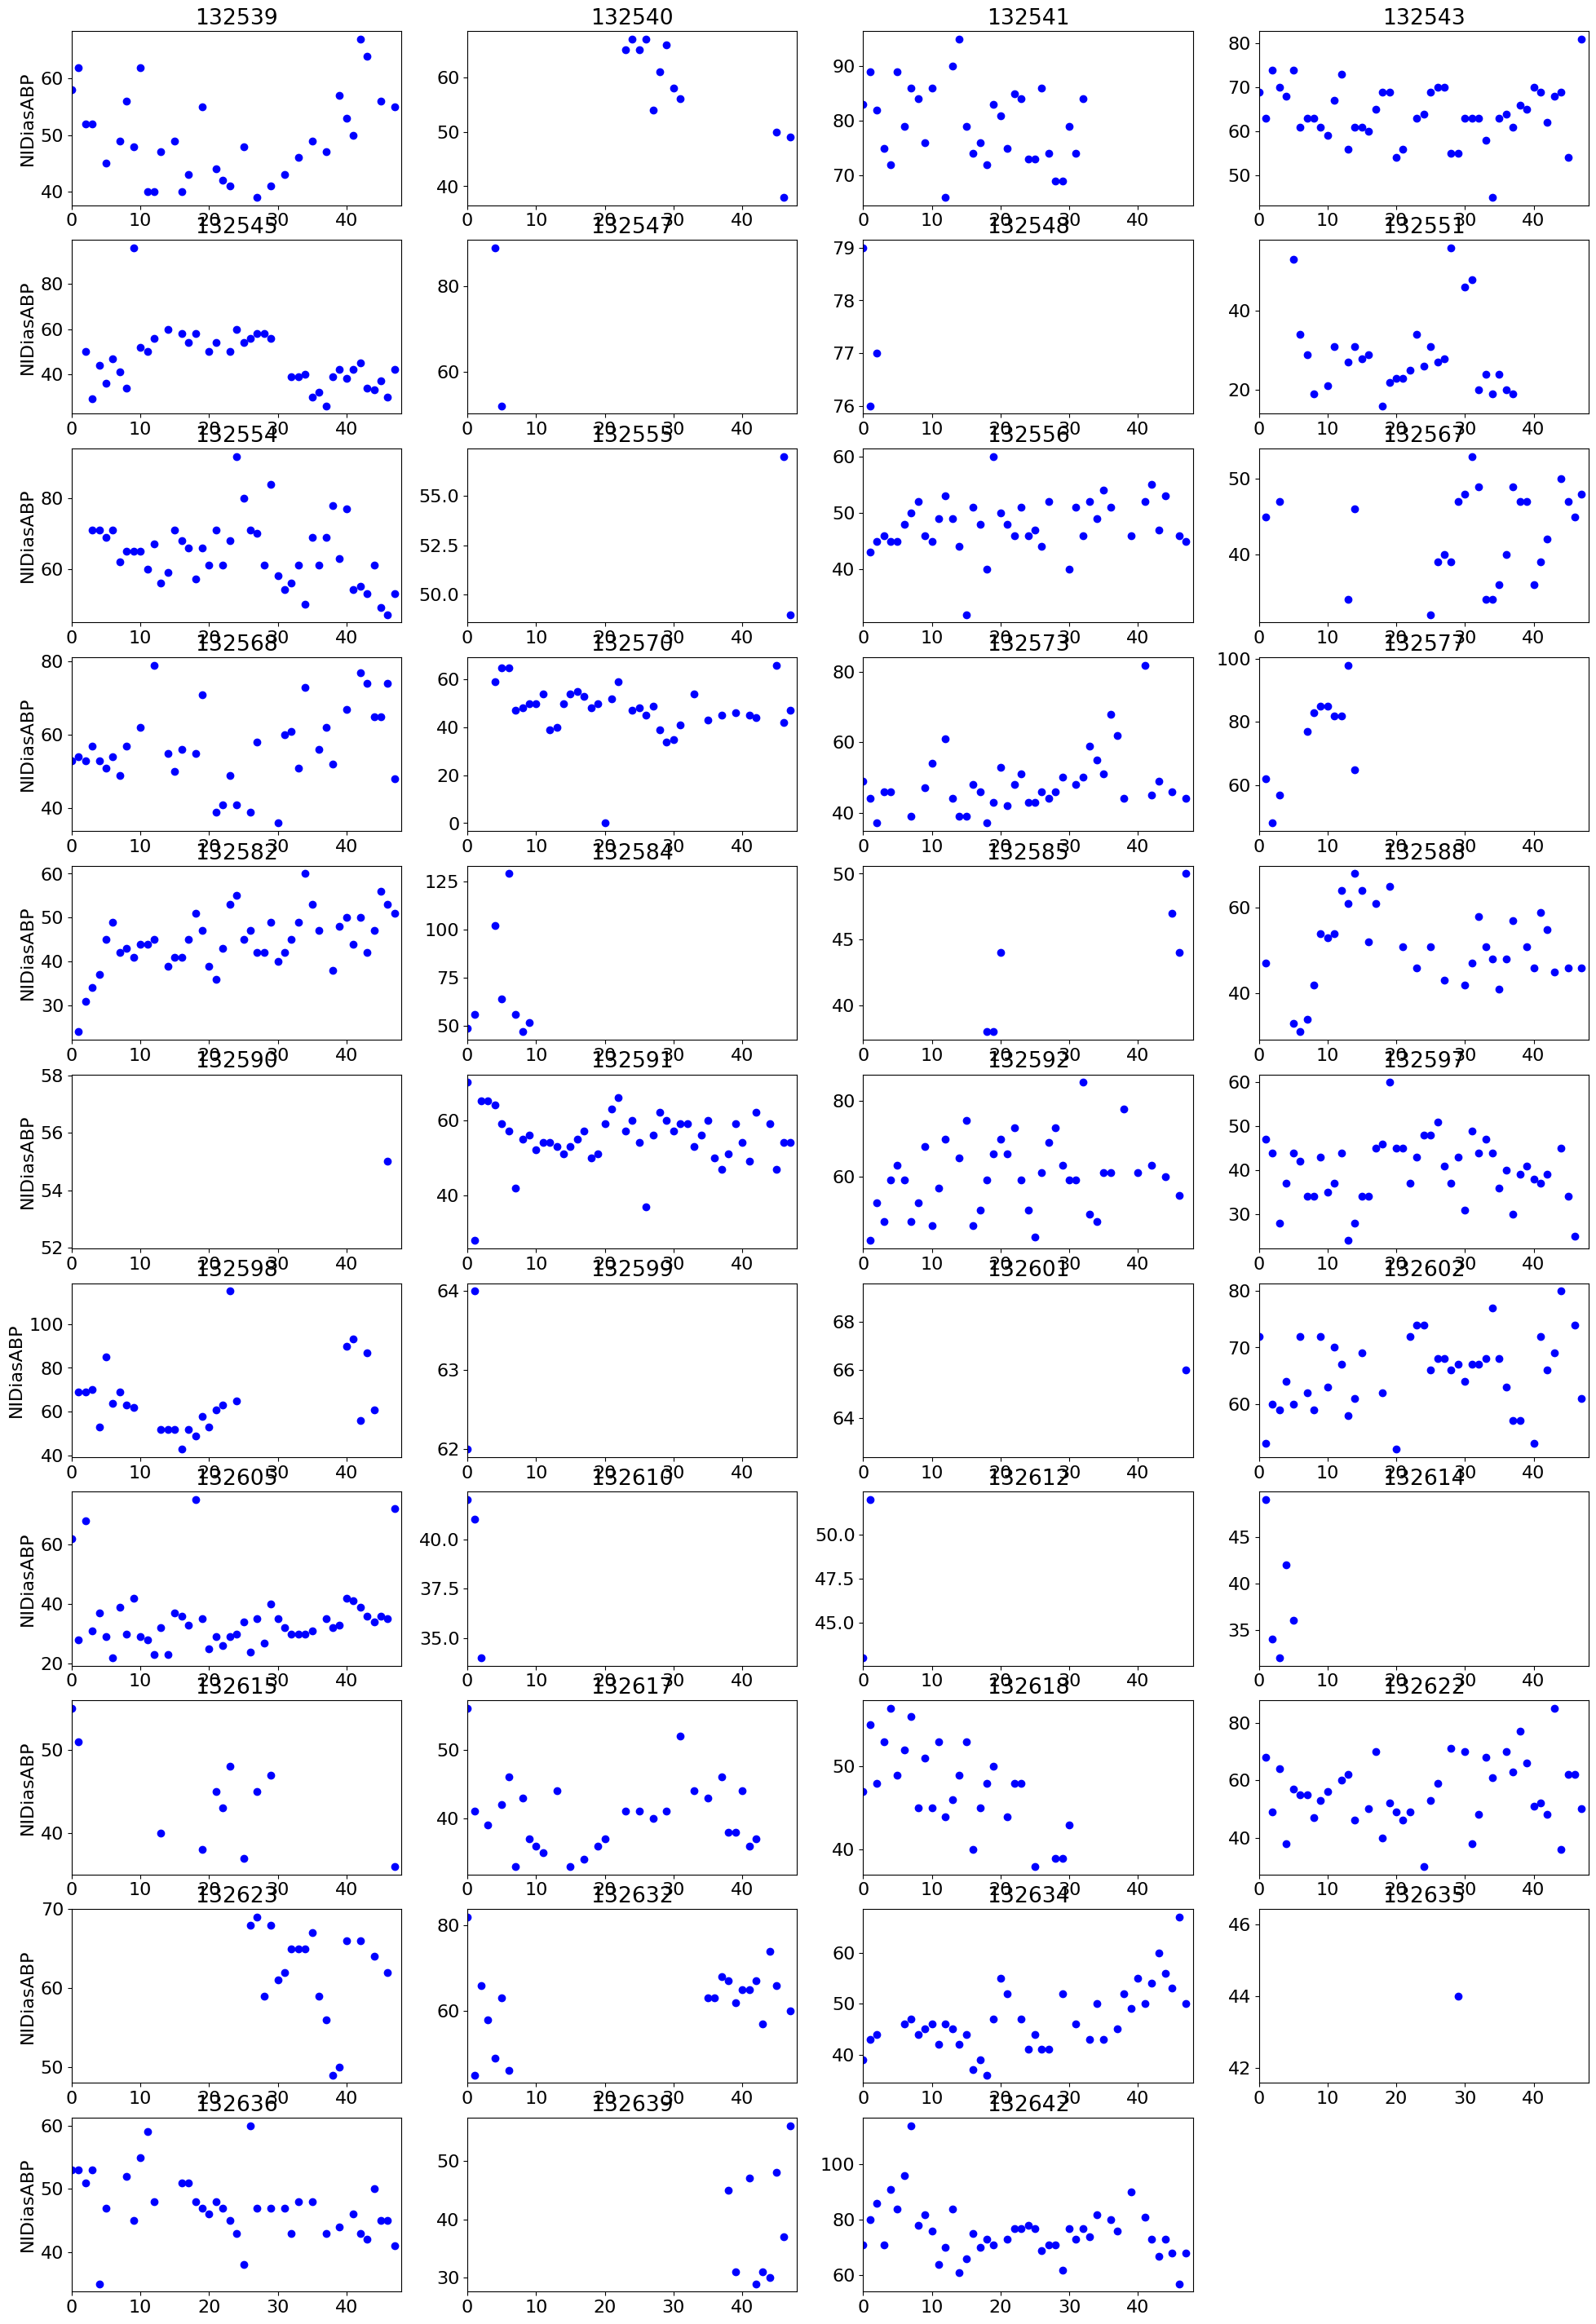

In [33]:

plt.rcParams["font.size"] = 16
L,K=attr_df.shape

fig, axes = plt.subplots(nrows=int(np.ceil(K/4)), ncols=4,figsize=(24.0, 36.0))
fig.delaxes(axes[-1][-1])

for k,_id in zip(range(K),attr_df.columns):
    df=pd.DataFrame({"x":np.arange(0,L),"val":attr_df[_id]})
    row = k // 4
    col = k % 4
    axes[row][col].plot(df.x,df.val, color = 'b',marker = 'o', linestyle='None')
    axes[row][col].set_xlim((0,L))
    axes[row][col].set_title(_id)
    
    
    if col == 0:
        plt.setp(axes[row, 0], ylabel=target_attr)
    if row == -1:
        plt.setp(axes[-1, col], xlabel='time')
#plt.suptitle("observed values in sample data")
plt.show()